In [1]:
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
os.chdir("../")
from src.models import BetaGeoModel
from src.data import (
    getDataset, ProcessData, RawFeatures
)

In [2]:
df_transaction = getDataset()

In [3]:
df_transaction.head()

,Customer ID,InvoiceDate,Price,Quantity
0,13085.0,1/12/2009 7:45,6.95,12.0
1,13085.0,1/12/2009 7:45,6.75,12.0
2,13085.0,1/12/2009 7:45,6.75,12.0
3,13085.0,1/12/2009 7:45,2.10,48.0
4,13085.0,1/12/2009 7:45,1.25,24.0


In [4]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981331 entries, 0 to 981330
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  741301 non-null  float64
 1   InvoiceDate  981330 non-null  object 
 2   Price        981330 non-null  float64
 3   Quantity     981330 non-null  float64
dtypes: float64(3), object(1)
memory usage: 29.9+ MB


In [5]:
data_inst = ProcessData(df_transaction, 'D', '2011-06-30')
data_summary = data_inst.model_data()
data_summary.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,7.0,400.0,726.0,11066.637143
12745.0,1.0,147.0,575.0,266.930000
12747.0,25.0,858.0,881.0,355.835600
12748.0,202.0,967.0,972.0,279.101436
12749.0,6.0,555.0,578.0,1020.433333


In [6]:
bgf = BetaGeoModel(data_summary, 7)
bgf.fit_()

In [7]:
bgf.conditional_probability_alive(100, 558, 881)
# Compute the probability that a customer with history (frequency, recency, T) is currently alive.

array([2.27647566e-14])

In [8]:
# plot_transaction_rate_heterogeneity(bgf);

# plot_dropout_rate_heterogeneity(bgf);

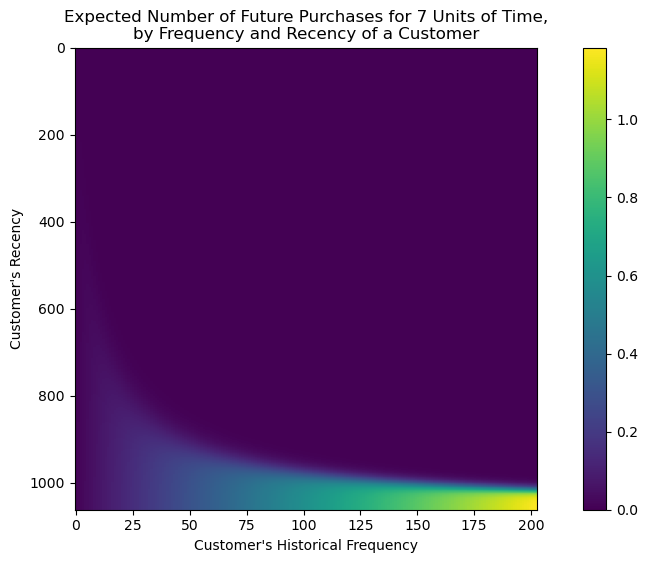

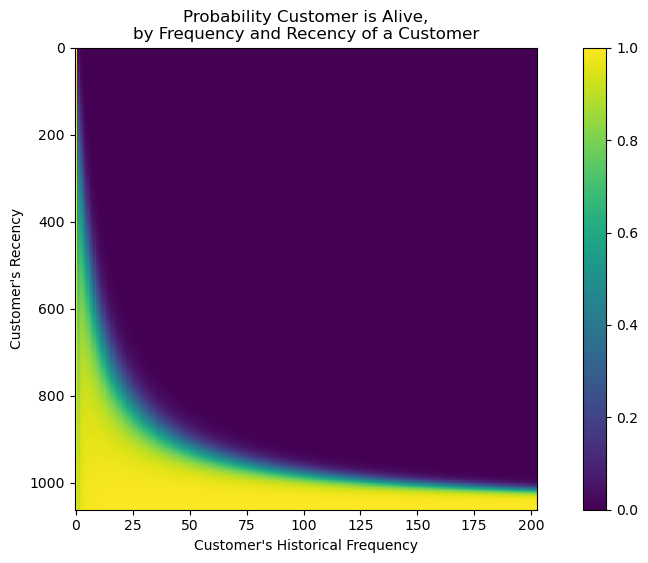

In [9]:
fig = plt.figure(figsize=(12, 6))
plot_frequency_recency_matrix(bgf, T = 7)

fig = plt.figure(figsize=(12, 6))
plot_probability_alive_matrix(bgf)

plt.show()

# Model validation

In [10]:
# partition the dataset into a calibration and a holdout dataset
summary_cal_holdout = data_inst.model_validation_data()

In [11]:
summary_cal_holdout

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
Customer ID,,,,,,,
12346.0,7.0,400.0,563.0,11066.637143,0.0,0.000000,163.0
12745.0,1.0,147.0,412.0,266.930000,0.0,0.000000,163.0
12747.0,22.0,716.0,718.0,356.498182,3.0,42.117200,163.0
12748.0,147.0,809.0,809.0,236.171429,55.0,8.043554,163.0
12749.0,4.0,397.0,415.0,1172.727500,2.0,19.089200,163.0
...,...,...,...,...,...,...,...
18277.0,2.0,253.0,507.0,366.265000,1.0,13.797500,163.0
18282.0,1.0,85.0,138.0,100.210000,0.0,0.000000,163.0
18283.0,13.0,505.0,512.0,132.194615,5.0,2.877848,163.0


In [12]:
# train BG/NBD model on the calibration data
bgf_cal = BetaGeoModel(data=summary_cal_holdout, T_prediction=7, penalizer_coef_=0.6)
bgf_cal.fit_validation()

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

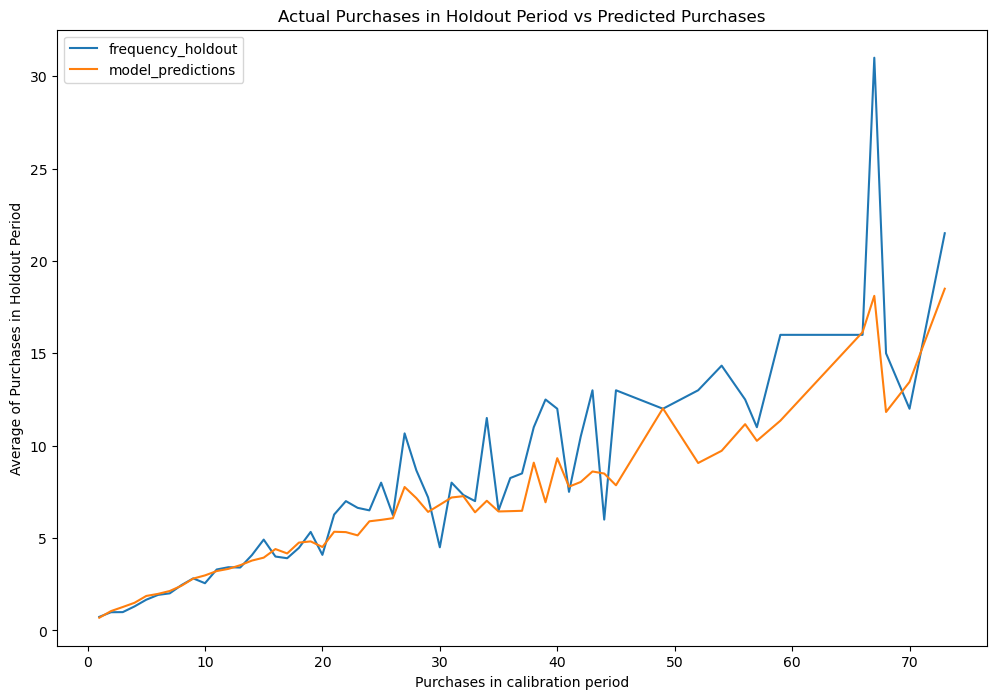

In [13]:
# plot actual vs predicted frequency during the holdout period
plot_calibration_purchases_vs_holdout_purchases(
	bgf_cal,
	summary_cal_holdout,
	n=int(summary_cal_holdout['frequency_holdout'].max()),
	figsize = (12, 8)
)

# n represents the max frequency values to be plotted on the x-axis